In [2]:
import cv2 
import numpy as np 
import matplotlib.pyplot as plt 

(301, 333, 3)


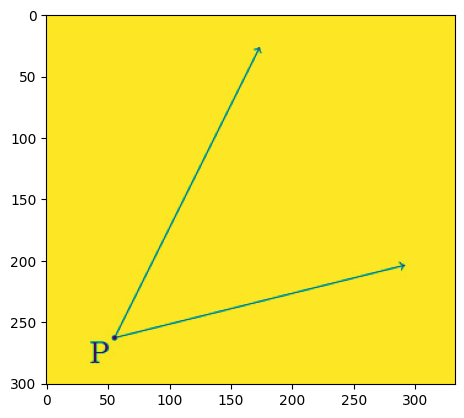

In [77]:
img = cv2.imread('../angle.jpg')
# image = cv2.imread('../flowers/garden_roses_00003.jpg')
print(img.shape)
# img= image
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)) 

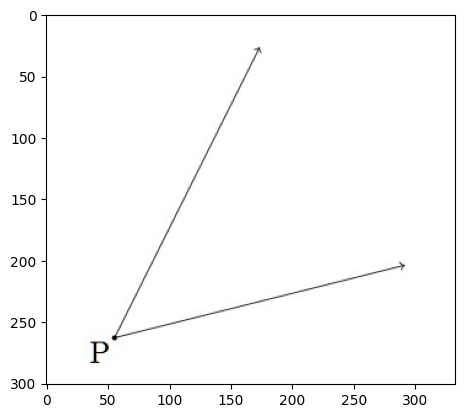

In [78]:
plt.imshow(img)

### Harris Corner Detection

1. Covert to GrayScale
2. Compute Gradients
3. Structure Tensor Components
4. Gaussian Filter
5. Harris Corner Response
6. Classify Points
7. Visualization

In [82]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)
gray.shape, gray.dtype  

((301, 333), dtype('float32'))

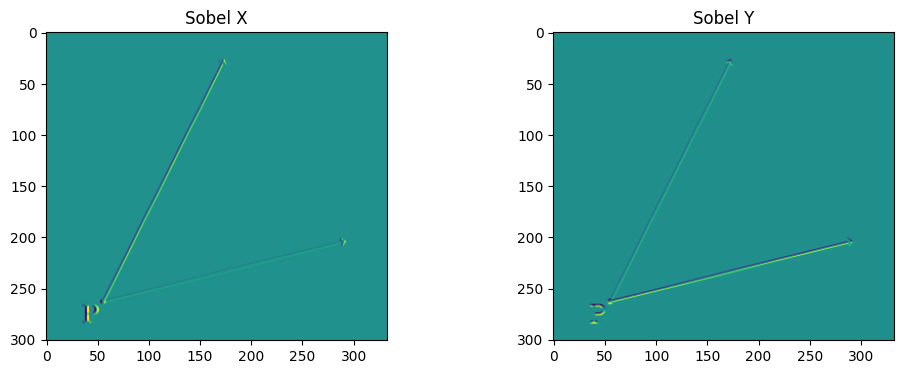

In [83]:
# gradient of the image
# using Sobel operator
Ix = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
Iy = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.title('Sobel X')
plt.imshow(Ix)

plt.subplot(1,2,2)
plt.title('Sobel Y')
plt.imshow(Iy)

plt.show()

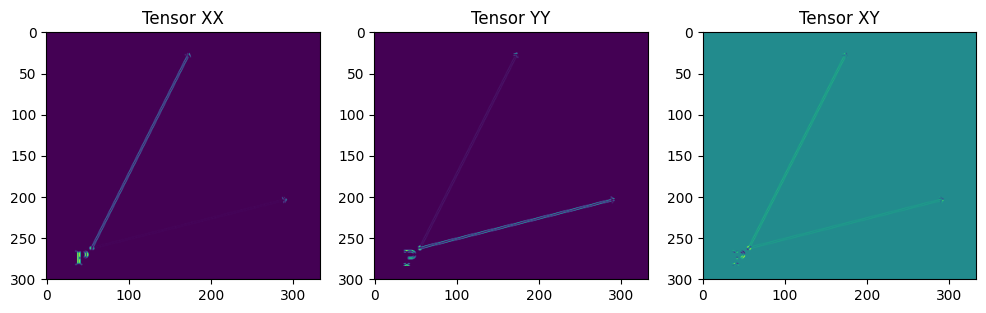

In [84]:
# structure tensor components
Ixx = Ix * Ix
Iyy = Iy * Iy
Ixy = Ix * Iy

plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.title('Tensor XX')
plt.imshow(Ixx)

plt.subplot(1,3,2)
plt.title('Tensor YY')
plt.imshow(Iyy)


plt.subplot(1,3,3)
plt.title('Tensor XY')
plt.imshow(Ixy)

plt.show()

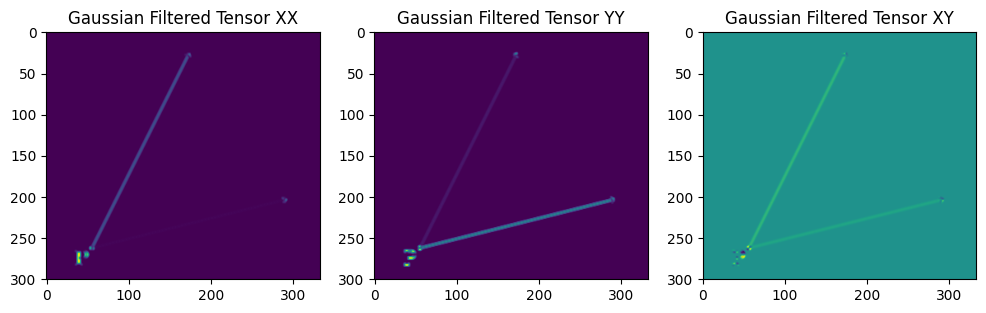

In [85]:
# gaussian filter to structure tensor components
Ixx = cv2.GaussianBlur(Ixx, (3, 3), sigmaX=1)
Iyy = cv2.GaussianBlur(Iyy, (3, 3), sigmaX=1)
Ixy = cv2.GaussianBlur(Ixy, (3, 3), sigmaX=1)

plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.title('Gaussian Filtered Tensor XX')
plt.imshow(Ixx)

plt.subplot(1,3,2)
plt.title('Gaussian Filtered Tensor YY')
plt.imshow(Iyy)


plt.subplot(1,3,3)
plt.title('Gaussian Filtered Tensor XY')
plt.imshow(Ixy)

plt.show()

For the harris response:
\begin{align*}
    R &= \det(M) - k \cdot (\text{trace}(M))^2 \\
    \text{where,} \\
    &\hspace{1cm} \det(M) = \lambda_1 \cdot \lambda_2, \\
    &\hspace{1cm} \text{trace}(M) = \lambda_1 + \lambda_2, \\
    &\hspace{1cm} \lambda_1, \lambda_2 \text{ are Eigenvalues}
\end{align*}

(301, 333) (301, 333) (301, 333)


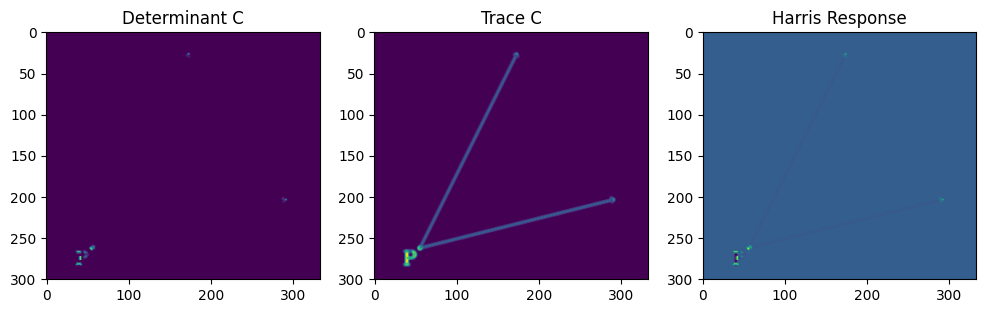

In [86]:
# compute Harris Corner detection
k = 0.04 # a parameter for detector
detC = Ixx * Iyy - Ixy ** 2
traceC = Ixx + Iyy
harris_response = detC - k * (traceC ** 2)
print(detC.shape, traceC.shape, harris_response.shape) 

plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.title('Determinant C')
plt.imshow(detC)

plt.subplot(1,3,2)
plt.title('Trace C')
plt.imshow(traceC)


plt.subplot(1,3,3)
plt.title('Harris Response')
plt.imshow(harris_response)

plt.show()

In [87]:
# classifying points: corners, edges, and flat regions
corner_threshold = 0.01 * harris_response.max()
edge_threshold = 0.001 * harris_response.max()
print(f'Corner Threshold is: {corner_threshold:.4f}')
print(f'Edge Threshold is: {edge_threshold:.4f}')

Corner Threshold is: 633373283.0425
Edge Threshold is: 63337328.3043


(301, 333) (301, 333) (301, 333)


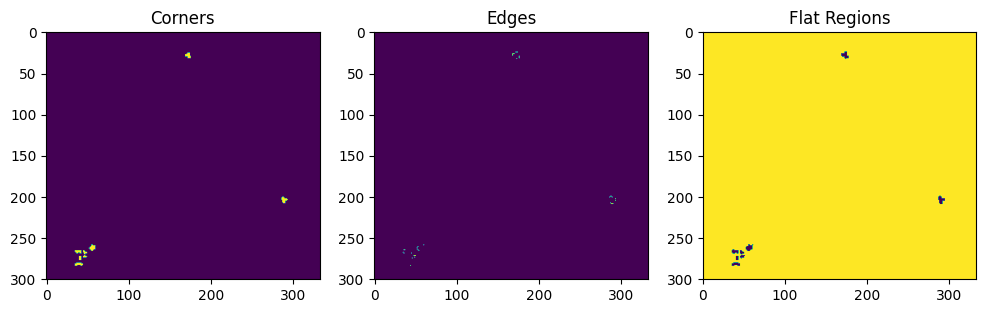

In [88]:
corners = harris_response > corner_threshold
edges = (harris_response > edge_threshold) & (harris_response <= corner_threshold)
flat_regions = harris_response <= edge_threshold
print(corners.shape, edges.shape, flat_regions.shape) 

plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.title('Corners')
plt.imshow(corners)

plt.subplot(1,3,2)
plt.title('Edges')
plt.imshow(edges)


plt.subplot(1,3,3)
plt.title('Flat Regions')
plt.imshow(flat_regions)

plt.show()

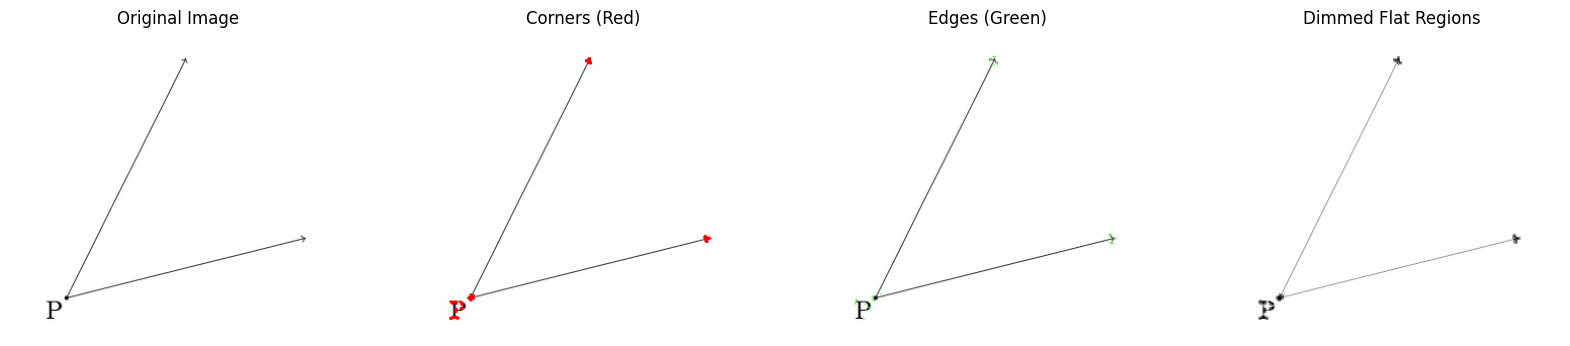

In [91]:
# visualization
corner_img = img.copy()
edge_img = img.copy()
flat_img = img.copy()

corner_img[corners] = [0, 0, 255]  # Red for corners

# Mark edges in green (entire edge region)
edge_mask = edges.astype(np.uint8) * 255
edge_img[edge_mask == 255] = [0, 255, 0]  # Green for edges

# Dim the flat regions
flat_mask = flat_regions.astype(np.uint8) * 255
flat_mask_colored = np.dstack([flat_mask] * 3)
flat_img = cv2.addWeighted(flat_img, 0.5, flat_mask_colored, 0.5, 0)  # Dim flat regions

# Plot the results
fig, axes = plt.subplots(1, 4, figsize=(20, 5))
axes[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
axes[0].set_title("Original Image")
axes[0].axis("off")

axes[1].imshow(cv2.cvtColor(corner_img, cv2.COLOR_BGR2RGB))
axes[1].set_title("Corners (Red)")
axes[1].axis("off")

axes[2].imshow(cv2.cvtColor(edge_img, cv2.COLOR_BGR2RGB))
axes[2].set_title("Edges (Green)")
axes[2].axis("off")

axes[3].imshow(cv2.cvtColor(flat_img, cv2.COLOR_BGR2RGB))
axes[3].set_title("Dimmed Flat Regions")
axes[3].axis("off")

plt.show()

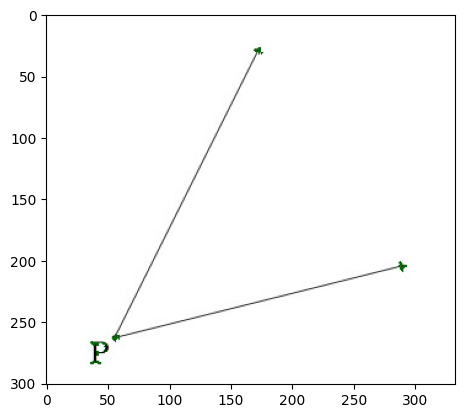

In [96]:
# with OpenCV function
dst = cv2.cornerHarris(gray, 2, 3, 0.04)
img[dst>0.01*dst.max()]=[0,100,0]
plt.imshow(img)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(435, 453, 3)
(435, 453, 3)


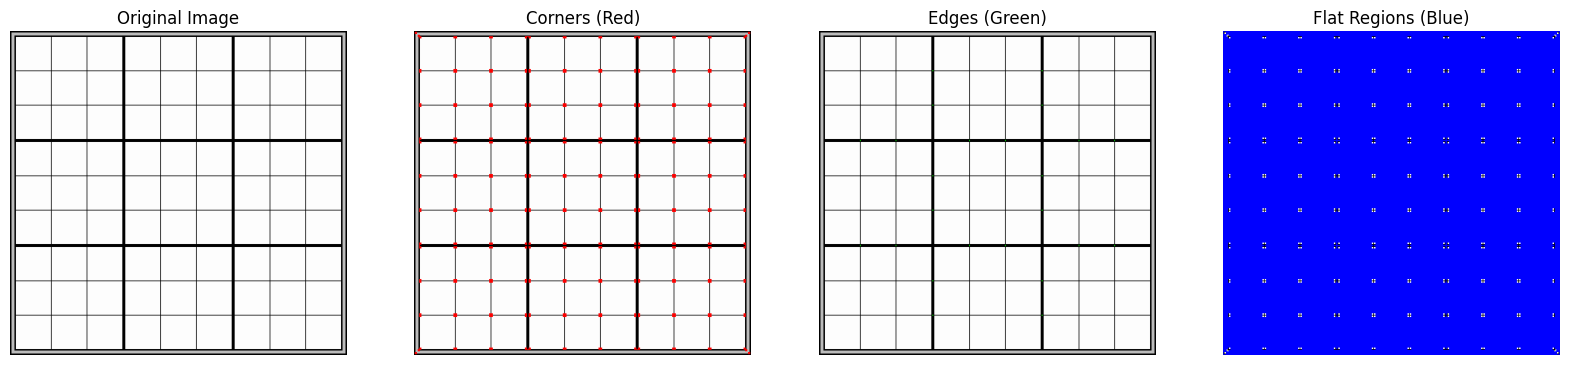

In [76]:
# visualization
corner_img = img.copy()
edge_img = img.copy()

corner_img[corners] = [0, 0, 255]  # Red for corners
edge_img[edges] = [0, 255, 0]      # Green for edges
flat_img = np.where(flat_regions[..., None], [5, 0, 0], img)  # Blue for flat regions


fig, axes = plt.subplots(1, 4, figsize=(20, 5))
axes[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
axes[0].set_title("Original Image")
axes[0].axis("off")

axes[1].imshow(cv2.cvtColor(corner_img, cv2.COLOR_BGR2RGB))
axes[1].set_title("Corners (Red)")
axes[1].axis("off")
print(edge_img.shape)
axes[2].imshow(cv2.cvtColor(edge_img, cv2.COLOR_BGR2RGB))
axes[2].set_title("Edges (Green)")
axes[2].axis("off")

print(flat_img.shape)
axes[3].imshow(cv2.cvtColor(np.float32(flat_img), cv2.COLOR_BGR2RGB))
axes[3].set_title("Flat Regions (Blue)")
axes[3].axis("off")

plt.show()

## SIFT

Corner detection does not work on scaled images. 
- Invariant to:

    - brightness
    - contrast
    - scale
    - rotation
    - 

1. Scale Space Extrema Detection

    - Gaussian Pyramid of images